# TRẢ LỜI CHO CÂU HỎI 5: 
## 1. Đâu là ban có nhiều thí sinh lựa chọn nhất ? 

- Các khối thi được lựa chọn là các khối có đa số thí sinh tham gia.
- Các khối thi sẽ được phân thành 2 ban là ban Xã hội và ban Tự nhiên. Lưu ý, có khối D01 sẽ nằm ở cả 2 ban Xã hội và Tự nhiên vì khối D01 là Toán, Văn, Anh.  

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# import những thư viện cần thiết

Đọc file csv đã được tiền xử lý

In [27]:
# Đọc và in ra thử 5 giá trị đầu của file
df = pd.read_csv('../../score_college_exam_data/score_college_exam_data.csv', index_col = 'Unnamed: 0')
df.head()

,Year,sbd,Toan,Van,Ngoai_ngu,Li,Hoa,Sinh,Su,Dia,GDCD
0,2019,24008611,8.2,8.00,7.6,NaN,NaN,NaN,8.25,7.75,8.75
1,2019,51000032,8.6,6.17,8.0,8.25,4.5,6.0,NaN,NaN,NaN
2,2019,51000005,5.2,4.75,NaN,NaN,NaN,NaN,4.00,4.25,5.75
3,2019,51000021,4.4,4.50,NaN,NaN,NaN,NaN,2.25,4.75,5.00
4,2019,51000013,5.8,6.00,4.4,NaN,NaN,NaN,7.75,8.25,7.50


#### Ta sẽ chia các khối : A, B, C, D
- Trong đó: 
  - Khối C00, C03, C04 thuộc về ban XÃ HỘI
  - Khối A00, A01, A02, B00, B08, C01, C02 thuộc về ban TỰ NHIÊN
  - Còn khối D01 sẽ thuộc về cả 2 ban.
- Tạo một dict với tên gọi là `chosen` là các khối mà thí sinh có thể sẽ lựa chọn

In [28]:
chosen = {
    # Ban tự nhiên
    'A00' : {'Toan', 'Li', 'Hoa'},
    'A01' : {'Toan', 'Li', 'Ngoai_ngu'},
    'A02' : {'Toan', 'Li', 'Sinh'}, 
    'B00' : {'Toan', 'Hoa', 'Sinh'},
    'B08' : {'Toan', 'Sinh', 'Ngoai_ngu'},
    'C01' : {'Van', 'Toan', 'Li'},
    'C02' : {'Van', 'Toan', 'Hoa'},

    # Ban xã hội
    'C00' : {'Van', 'Su', 'Dia'},  
    'C03' : {'Van', 'Toan', 'Su'},
    'C04' : {'Van', 'Toan', 'Dia'},

    # Khối D01 nằm ở giữa 2 ban
    'D01' : {'Toan', 'Van', 'Ngoai_ngu'}
}

#### Dựa trên điểm số của mỗi thí sinh dự đoán xem thí sinh này nên chọn nguyện vọng theo khối nào là tốt nhất.
- Dựa vào kì vọng tốt nhất ở trên mà sẽ phân loại thí sinh đó thuộc về khối nào.
- Thông thường thí sinh sẽ quan tâm vào khối mà mình chọn nhất nên điểm của các môn thuộc khối mà thí sinh chọn sẽ cao hơn so với điểm các khối còn lại.

In [29]:
# Phân loại ban
# Xã hội
Social_Sciene = ['Su', 'Dia', 'GDCD']
# Tự nhiên
Nature_Sciene = ['Li', 'Hoa', 'Sinh']

Những thí sinh theo ban tự nhiên

In [30]:
nature_science_df = df.drop(Social_Sciene, axis = 1).dropna()
nature_science_df.head()

,Year,sbd,Toan,Van,Ngoai_ngu,Li,Hoa,Sinh
1,2019,51000032,8.6,6.17,8.0,8.25,4.50,6.00
5,2019,51000003,7.2,6.75,4.4,7.50,5.75,3.00
8,2019,51000007,5.6,4.50,2.2,5.50,3.50,3.75
14,2019,51000014,7.0,6.25,3.6,7.00,5.00,4.75
15,2019,51000019,7.8,7.25,8.8,8.00,6.75,6.25


Những thí sinh ban xã hội

In [31]:
social_science_df = df.drop(Nature_Sciene, axis = 1).dropna()
social_science_df.head()

,Year,sbd,Toan,Van,Ngoai_ngu,Su,Dia,GDCD
0,2019,24008611,8.2,8.0,7.6,8.25,7.75,8.75
4,2019,51000013,5.8,6.0,4.4,7.75,8.25,7.50
7,2019,51000011,5.0,6.5,8.8,5.25,6.25,8.75
9,2019,51000010,6.6,7.0,5.2,3.25,7.50,8.50
10,2019,51000018,7.4,9.0,4.8,7.00,7.25,9.00


In [32]:
def committee(df):
    Social_Sciene = ['Su', 'Dia', 'GDCD']
    Nature_Sciene = ['Li', 'Hoa', 'Sinh']

    social_science_df = df.drop(Nature_Sciene, axis = 1).dropna()
    nature_science_df = df.drop(Social_Sciene, axis = 1).dropna()
    
    return social_science_df, nature_science_df

### Kiểm tra dữ liệu số lượng các thí sinh trong 4 năm
- Tính số lượng thí sinh ban tự nhiên và ban xã hội lần lược lưu vào biến `nature_candidates` và `social_candidates`.
- Nếu để ý, ta sẽ thấy tổng số lượng thí sinh ban tự nhiên và ban xã hội sẽ không bằng số lượng thí sinh tham gia kì thi, nguyên nhân là do đâu ?

In [33]:
nature_candidates = nature_science_df.shape[0]
social_candidates = social_science_df.shape[0]

# Tổng số lượng thí sinh 2 ban
candidates = nature_candidates + social_candidates

In [34]:
assert candidates < df.shape[0]

**Trả lời câu hỏi:** Nguyên do là do các trường hợp thí sinh tự do hoặc do bỏ thi.

### Trước khi đến với việc làm trên từng năm, ta hãy làm trước trên 4 năm liên tục.
Kiểm tra xem ban nào nhiều thí sinh hơn

In [35]:
if nature_candidates > social_candidates:
    print('Ban tự nhiên được yêu thích hơn !!')
elif social_candidates > nature_candidates:
    print('Ban xã hội được yêu thích hơn !!')
else:
    print('Số lượng thí sinh giữa 2 ban là như nhau !!')

Ban xã hội được yêu thích hơn !!


Sau khi có được câu trả lời thì ta cùng vẽ đồ thị ra để thấy được sự chênh lệch giữa 2 ban qua từng năm.

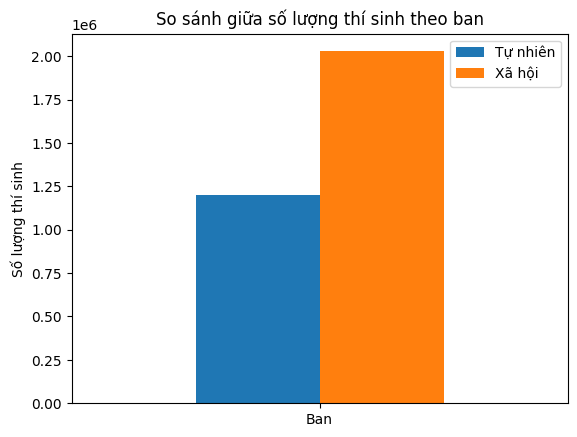

In [36]:
pd.DataFrame([[nature_candidates, social_candidates]], columns = ['Tự nhiên', 'Xã hội']).plot.bar()
plt.xticks([0], ['Ban'], rotation = 0)
plt.ylabel('Số lượng thí sinh')
plt.title('So sánh giữa số lượng thí sinh theo ban')
plt.show()

### Theo từng năm thì ban nào được các thí sinh yêu thích hơn:

**Chia theo từng năm và lưu vào dataframe mới tên là `score_<năm>_df`**

In [37]:
score_2019_df = df[df['Year'] == 2019]
score_2019_df.head()

,Year,sbd,Toan,Van,Ngoai_ngu,Li,Hoa,Sinh,Su,Dia,GDCD
0,2019,24008611,8.2,8.00,7.6,NaN,NaN,NaN,8.25,7.75,8.75
1,2019,51000032,8.6,6.17,8.0,8.25,4.5,6.0,NaN,NaN,NaN
2,2019,51000005,5.2,4.75,NaN,NaN,NaN,NaN,4.00,4.25,5.75
3,2019,51000021,4.4,4.50,NaN,NaN,NaN,NaN,2.25,4.75,5.00
4,2019,51000013,5.8,6.00,4.4,NaN,NaN,NaN,7.75,8.25,7.50


In [38]:
score_2020_df = df[df['Year'] == 2020]
score_2020_df.head()

,Year,sbd,Toan,Van,Ngoai_ngu,Li,Hoa,Sinh,Su,Dia,GDCD
0,2020,18014547,6.4,6.75,4.2,NaN,NaN,NaN,4.75,7.00,6.50
1,2020,18014530,7.6,6.00,2.8,NaN,NaN,NaN,3.75,7.75,7.75
2,2020,18014521,4.8,4.75,NaN,NaN,NaN,NaN,4.00,6.50,NaN
3,2020,18014517,8.0,7.00,5.8,NaN,NaN,NaN,8.25,8.00,9.50
4,2020,18014523,8.2,6.50,4.0,8.0,8.5,5.0,NaN,NaN,NaN


In [39]:
score_2021_df = df[df['Year'] == 2021]
score_2021_df.head()

,Year,sbd,Toan,Van,Ngoai_ngu,Li,Hoa,Sinh,Su,Dia,GDCD
870486,2021,1000043,8.0,8.50,8.8,NaN,NaN,NaN,5.75,6.50,8.75
870487,2021,1000163,3.8,7.50,NaN,NaN,NaN,NaN,6.75,7.00,NaN
870488,2021,1000040,3.8,2.00,NaN,NaN,NaN,NaN,2.50,4.50,NaN
870489,2021,1000007,9.0,5.25,9.0,7.25,4.75,3.5,NaN,NaN,NaN
870490,2021,1000180,8.8,8.50,9.6,NaN,NaN,NaN,5.25,7.25,8.00


In [40]:
score_2022_df = df[df['Year'] == 2022]
score_2022_df.head()

,Year,sbd,Toan,Van,Ngoai_ngu,Li,Hoa,Sinh,Su,Dia,GDCD
0,2022,1000001,3.6,5.00,4.0,NaN,NaN,NaN,2.75,6.0,8.75
1,2022,1000002,8.4,6.75,7.6,NaN,NaN,NaN,8.50,7.5,8.25
2,2022,1000003,5.8,7.50,5.0,NaN,NaN,NaN,7.25,5.5,8.75
3,2022,1000004,7.4,7.50,8.6,NaN,NaN,NaN,7.50,6.5,7.50
4,2022,1000005,7.2,8.50,9.0,NaN,NaN,NaN,8.00,8.5,8.25


In [41]:
years = { '2019': score_2019_df,
          '2020': score_2020_df,
          '2021': score_2021_df,
          '2022': score_2022_df }


**Bây giờ dựa vào những dữ liệu và phương thức ở trên, ta hãy tính toán, minh họa và đưa ra kết luận**
- Tính số lượng thí sinh của ban Xã hội và Tự nhiên theo các năm.
- Vẽ hình, trực quan hóa dữ liệu.
- Kết luận gì qua các năm hay không ?

In [42]:
def shape_of_Committee(df):
    social_science_df, nature_science_df = committee(df)
    nature_candidates = nature_science_df.shape[0]
    social_candidates = social_science_df.shape[0]
    return nature_candidates, social_candidates

def compare2Committee(years):
    for year in years.keys():
        df = years[year]
        nature_candidates_year, social_candidates_year = shape_of_Committee(df)
        if nature_candidates_year > social_candidates_year:
            print('Năm ' + year + 'có ban tự nhiên được yêu thích hơn !!')
        elif social_candidates_year > nature_candidates_year:
            print('Năm ' + year + ' có ban xã hội được yêu thích hơn !!')
        else:
            print('Năm ' + year + 'có số lượng thí sinh giữa 2 ban là như nhau !!')
       
compare2Committee(years)

Năm 2019 có ban xã hội được yêu thích hơn !!
Năm 2020 có ban xã hội được yêu thích hơn !!
Năm 2021 có ban xã hội được yêu thích hơn !!
Năm 2022 có ban xã hội được yêu thích hơn !!


#### Trực quan hóa dữ liệu từng năm

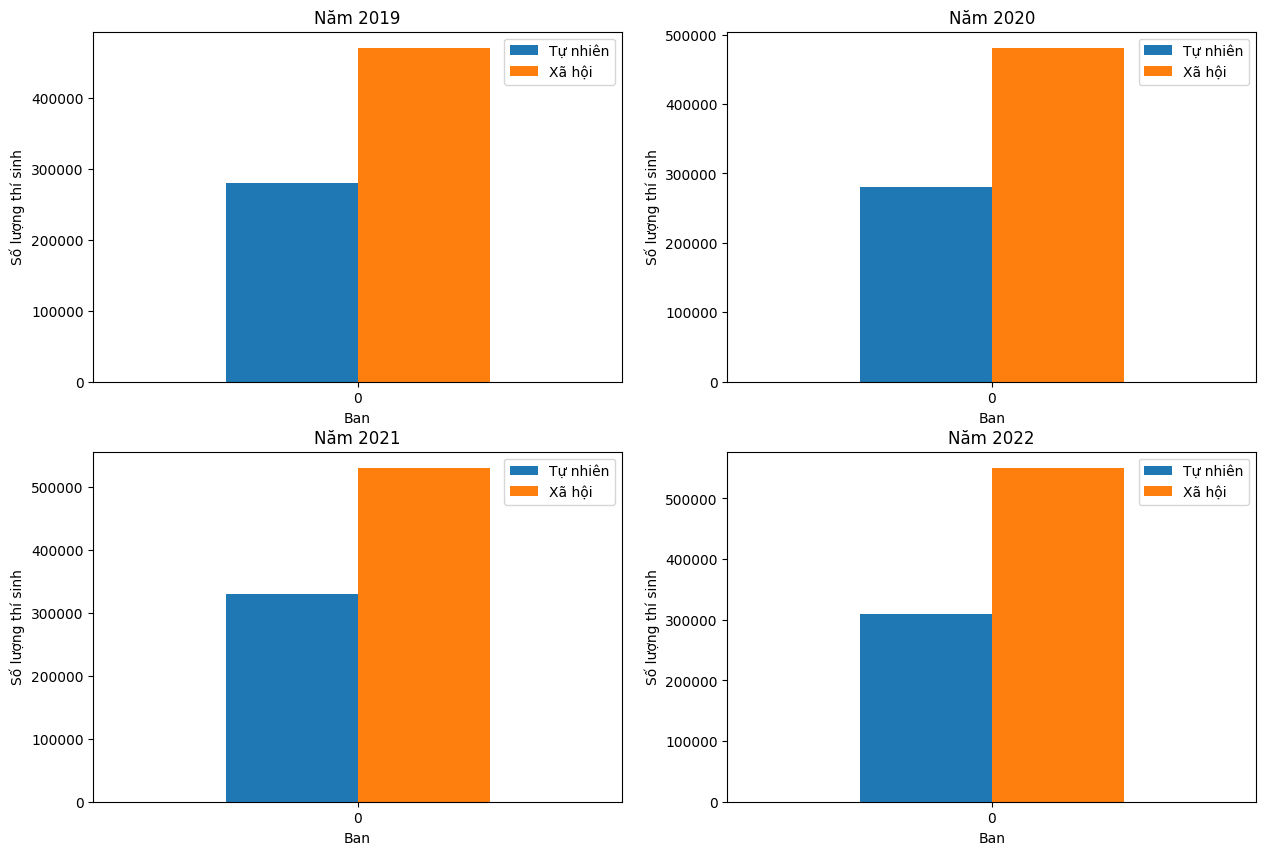

In [43]:
def visualization_committee(years):
    fig, axes = plt.subplots(2, 2, figsize = (15, 10))
    i = 0
    for year in years:
        df = years[year]
        nature, social = shape_of_Committee(df)
        x = i // 2
        y = i % 2
        pd.DataFrame([[nature, social]], 
                        columns = ['Tự nhiên', 'Xã hội']).plot.bar(ax = axes[x][y])

        axes[x][y].title.set_text('Năm ' + year)
        axes[x][y].set_xlabel('Ban')
        axes[x][y].set_ylabel('Số lượng thí sinh')
        axes[x][y].tick_params(labelrotation = 0)
        i += 1
    plt.show()
visualization_committee(years)

**Kết luận:** Ban xã hội là ban được yêu thích nhất so với ban tự nhiên xuyên suốt 4 năm

## 2. Dự đoán thí sinh sẽ chọn khối thi
- Dựa trên các khối thi đã vạch ra từ trước, ta hãy tính điểm của từng khối thi theo ban mà thí sinh có thể đạt được.
- Sau đó ta sẽ tìm điểm max của các khối thi mà thí sinh của ban đó có thể đạt được.
- Từ điểm max ta có thể kết luận được thí sinh đó chọn khối nào.

**Tuy nhiên**: Dữ liệu chúng ta lưu là một dataframe, nên ta hạn chế vòng lặp tìm max và tìm khối thi có điểm là max.

In [44]:
def max_total_score_exam(score_df, chosen):
    df = score_df.copy()
    for key in chosen.keys():
        if chosen[key].issubset(df.columns):
            add = df[list(chosen[key])].sum(axis = 1)
            df.insert(8, key, add, True)

    max = df.iloc[:, 8:].max(axis = 1)
    idmax = df.iloc[:, 8:].idxmax(axis = 1)
    df.insert(df.shape[1], 'Điểm tổng', max, True)
    df.insert(df.shape[1], 'Khối thi dự đoán', idmax, True)
    return df
    

### Xử lý trước trên 4 năm
#### Kiểm tra dữ liệu sau khi dự đoán


In [45]:
social_score = max_total_score_exam(social_science_df, chosen)
social_score.head()

,Year,sbd,Toan,Van,Ngoai_ngu,Su,Dia,GDCD,D01,C04,C03,C00,Điểm tổng,Khối thi dự đoán
0,2019,24008611,8.2,8.0,7.6,8.25,7.75,8.75,23.8,23.95,24.45,24.00,24.45,C03
4,2019,51000013,5.8,6.0,4.4,7.75,8.25,7.50,16.2,20.05,19.55,22.00,22.00,C00
7,2019,51000011,5.0,6.5,8.8,5.25,6.25,8.75,20.3,17.75,16.75,18.00,20.30,D01
9,2019,51000010,6.6,7.0,5.2,3.25,7.50,8.50,18.8,21.10,16.85,17.75,21.10,C04
10,2019,51000018,7.4,9.0,4.8,7.00,7.25,9.00,21.2,23.65,23.40,23.25,23.65,C04


In [46]:
nature_score = max_total_score_exam(nature_science_df, chosen)
nature_score.head()

,Year,sbd,Toan,Van,Ngoai_ngu,Li,Hoa,Sinh,D01,C02,C01,B08,B00,A02,A01,A00,Điểm tổng,Khối thi dự đoán
1,2019,51000032,8.6,6.17,8.0,8.25,4.50,6.00,22.77,19.27,23.02,22.60,19.10,22.85,24.85,21.35,24.85,A01
5,2019,51000003,7.2,6.75,4.4,7.50,5.75,3.00,18.35,19.70,21.45,14.60,15.95,17.70,19.10,20.45,21.45,C01
8,2019,51000007,5.6,4.50,2.2,5.50,3.50,3.75,12.30,13.60,15.60,11.55,12.85,14.85,13.30,14.60,15.60,C01
14,2019,51000014,7.0,6.25,3.6,7.00,5.00,4.75,16.85,18.25,20.25,15.35,16.75,18.75,17.60,19.00,20.25,C01
15,2019,51000019,7.8,7.25,8.8,8.00,6.75,6.25,23.85,21.80,23.05,22.85,20.80,22.05,24.60,22.55,24.60,A01


#### Sau khi có được dự đoán thí sinh chọn khối thi thì ta có thể trực quan hóa để dễ nhìn hơn.

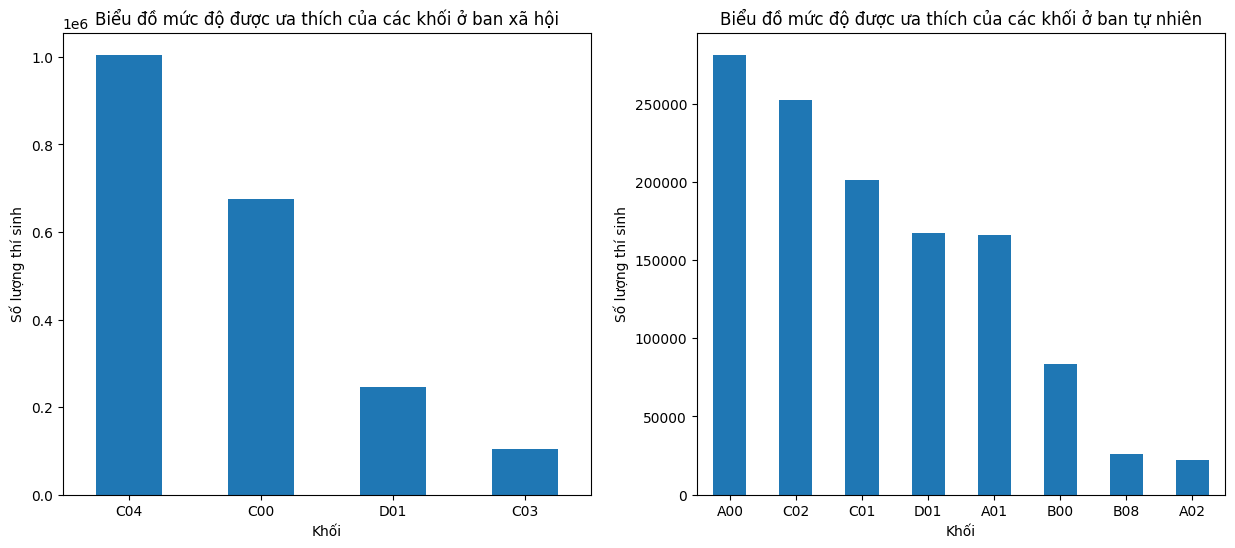

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))
social_score.iloc[:, -1].value_counts().plot.bar(ax = ax[0])
nature_score.iloc[:, -1].value_counts().plot.bar(ax = ax[1])
ax[0].title.set_text('Biểu đồ mức độ được ưa thích của các khối ở ban xã hội')
ax[1].title.set_text('Biểu đồ mức độ được ưa thích của các khối ở ban tự nhiên')

ax[0].set_xlabel('Khối')
ax[1].set_xlabel('Khối')

ax[0].set_ylabel('Số lượng thí sinh')
ax[1].set_ylabel('Số lượng thí sinh')

ax[0].tick_params(labelrotation = 0)
ax[1].tick_params(labelrotation = 0)

plt.show()

**Kết luận:** 
- Khối có số lượng thí sinh cao nhất trong ban XÃ HỘI là: C04
- Khối có số lượng thí sinh cao nhất trong ban TỰ NHIÊN là: A00

### Bây giờ ta sẽ thực hiện theo từng năm
#### Xuất 1 vài dữ liệu mẫu 2020, 2021

In [48]:
social_score_2020, nature_score_2020 = committee(years['2020'])
nature_score = max_total_score_exam(nature_score_2020, chosen)
nature_score.head()

,Year,sbd,Toan,Van,Ngoai_ngu,Li,Hoa,Sinh,D01,C02,C01,B08,B00,A02,A01,A00,Điểm tổng,Khối thi dự đoán
4,2020,18014523,8.2,6.50,4.0,8.00,8.50,5.00,18.70,23.20,22.70,17.20,21.70,21.20,20.20,24.70,24.70,A00
9,2020,18014527,9.4,7.00,4.0,7.50,7.75,4.50,20.40,24.15,23.90,17.90,21.65,21.40,20.90,24.65,24.65,A00
11,2020,18014515,8.0,6.75,5.0,7.25,7.75,4.75,19.75,22.50,22.00,17.75,20.50,20.00,20.25,23.00,23.00,A00
13,2020,18014548,7.6,7.75,4.6,5.50,6.25,6.75,19.95,21.60,20.85,18.95,20.60,19.85,17.70,19.35,21.60,C02
15,2020,18014519,8.2,6.75,5.6,8.50,8.25,5.00,20.55,23.20,23.45,18.80,21.45,21.70,22.30,24.95,24.95,A00


In [49]:
social_score_2021, nature_score_2021 = committee(years['2021'])
social_score = max_total_score_exam(social_score_2021, chosen)
social_score.head()

,Year,sbd,Toan,Van,Ngoai_ngu,Su,Dia,GDCD,D01,C04,C03,C00,Điểm tổng,Khối thi dự đoán
870486,2021,1000043,8.0,8.50,8.8,5.75,6.50,8.75,25.30,23.00,22.25,20.75,25.30,D01
870490,2021,1000180,8.8,8.50,9.6,5.25,7.25,8.00,26.90,24.55,22.55,21.00,26.90,D01
870492,2021,1000149,7.8,7.25,6.8,4.75,6.75,7.25,21.85,21.80,19.80,18.75,21.85,D01
870493,2021,1000172,3.2,6.75,6.4,2.25,6.50,5.75,16.35,16.45,12.20,15.50,16.45,C04
870494,2021,1000033,8.6,8.50,9.8,6.50,7.00,9.50,26.90,24.10,23.60,22.00,26.90,D01


#### Trực quan hóa dữ liệu điểm thi của các khối qua từng năm

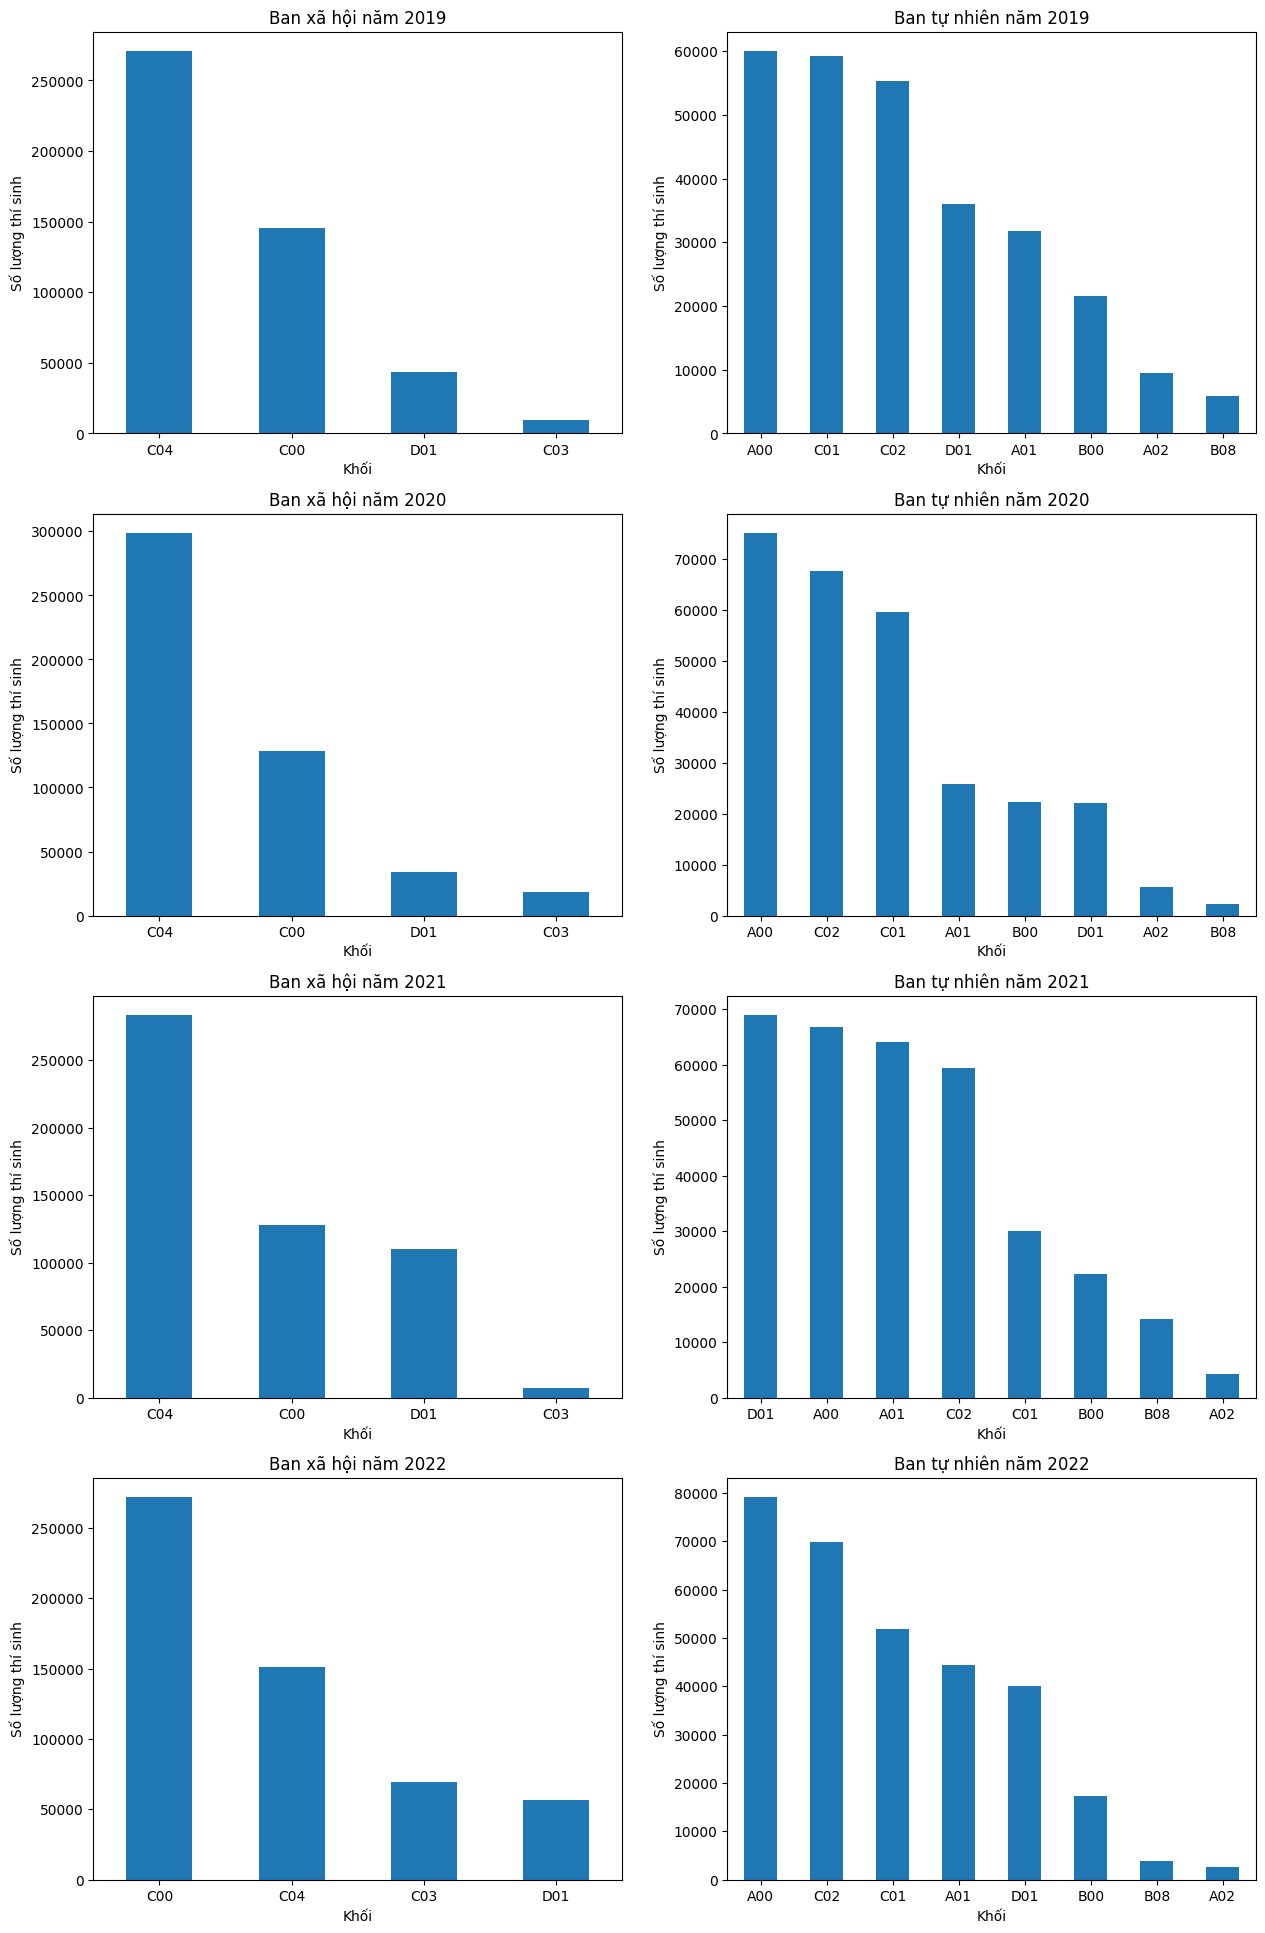

In [50]:
def visualization(years):
    fig, axes = plt.subplots(4, 2, figsize=(15,24))
    i = 0
    for year in years.keys():
        df = years[year]
        social_score_year, nature_score_year = committee(df)
        social_score_year = max_total_score_exam(social_score_year, chosen)
        nature_score_year = max_total_score_exam(nature_score_year, chosen)

        social_score_year.iloc[:, -1].value_counts().plot.bar(ax = axes[i][0])
        nature_score_year.iloc[:, -1].value_counts().plot.bar(ax = axes[i][1])

        axes[i][0].title.set_text('Ban xã hội năm ' + year)
        axes[i][1].title.set_text('Ban tự nhiên năm ' + year)

        axes[i][0].set_xlabel('Khối')
        axes[i][1].set_xlabel('Khối')

        axes[i][0].set_ylabel('Số lượng thí sinh')
        axes[i][1].set_ylabel('Số lượng thí sinh')

        axes[i][0].tick_params(labelrotation = 0)
        axes[i][1].tick_params(labelrotation = 0)
        i += 1

    plt.show()

visualization(years)

**NHẬN XÉT:**
- Ban xã hội: Năm 2019 đến 2022 thì Khối C00 vẫn luôn đứng đầu.
- Ban tự nhiên: Năm 2020 đến 2021 có sự thay đổi rõ rệt trong khối D01 từ top 6 năm 2020 thì khối D01 bỗng đứng đầu với top 1 năm 2021

**GIẢI THÍCH:**
Điểm khối D01 có thể tăng nhiều hơn so với mọi năm một phần có thể do điểm AV và điểm toán 2021 đã tăng hơn so với 2020, và điểm ngữ văn có thể là ổn hơn so với các môn khác nên khối D01 được ưa chuộng hơn các khối khác.